<a href="https://colab.research.google.com/github/Sreeja0522/Image-Recognition-with-MNIST-Dataset/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)
x_small = x_train[:1000]
y_small = y_train[:1000]

model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
32/32 - 16s - 501ms/step - accuracy: 0.5750 - loss: 1.3313 - val_accuracy: 0.8168 - val_loss: 0.5268
Epoch 2/50
32/32 - 12s - 370ms/step - accuracy: 0.8820 - loss: 0.3514 - val_accuracy: 0.9180 - val_loss: 0.2679
Epoch 3/50
32/32 - 5s - 148ms/step - accuracy: 0.9540 - loss: 0.1306 - val_accuracy: 0.8752 - val_loss: 0.4150
Epoch 4/50
32/32 - 4s - 135ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.8985 - val_loss: 0.4654
Epoch 5/50
32/32 - 4s - 137ms/step - accuracy: 0.9690 - loss: 0.0854 - val_accuracy: 0.9003 - val_loss: 0.6617
Epoch 6/50
32/32 - 4s - 134ms/step - accuracy: 0.9740 - loss: 0.0808 - val_accuracy: 0.9013 - val_loss: 0.4228
Epoch 7/50
32/32 - 5s - 144ms/step - accuracy: 0.9850 - loss: 0.0391 - val_accuracy: 0.9282 - val_loss: 0.3279
Epoch 8/50
32/32 - 5s - 160ms/step - accuracy: 0.9710 - loss: 0.1134 - val_accuracy: 0.9127 - val_loss: 0.2906
Epoch 9/50
32/32 - 5s - 144ms/step - accuracy: 0.9920 - loss: 0.0448 - val_accuracy: 0.9152 - val_loss: 0.5683

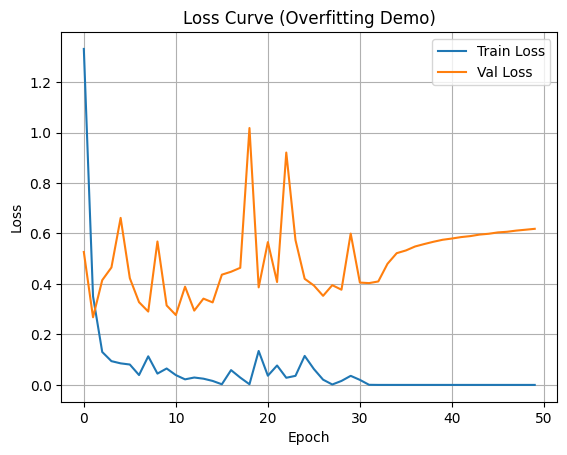

In [8]:


history = model.fit(
    x_small, y_small,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (Overfitting Demo)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


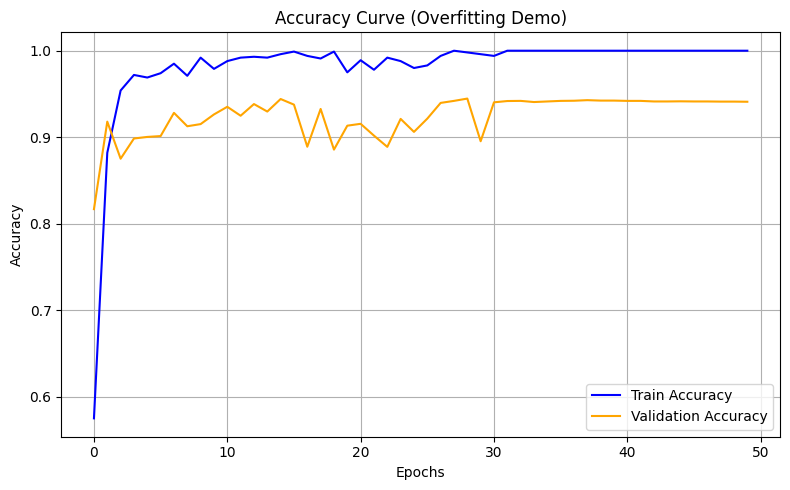

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve (Overfitting Demo)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
